In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
file_path = "/kaggle/input/mnist-dataset/mnist_compressed.npz"
data = np.load(file_path)

In [3]:
x_train = data['train_images']
y_train = data['train_labels']
x_test = data['test_images']
y_test = data['test_labels']

In [4]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [5]:
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [6]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = x_train.shape[1:]),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

In [9]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 20, batch_size = 32)

Epoch 1/20


I0000 00:00:1732270980.973925      69 service.cc:145] XLA service 0x7a068800b040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732270980.973974      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732270980.973978      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  53/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0096 - loss: 4.6094

I0000 00:00:1732270986.968801      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.3732 - loss: 2.5016 - val_accuracy: 0.9470 - val_loss: 0.1868
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8129 - loss: 0.6032 - val_accuracy: 0.9632 - val_loss: 0.1223
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8593 - loss: 0.4469 - val_accuracy: 0.9675 - val_loss: 0.1009
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8816 - loss: 0.3801 - val_accuracy: 0.9702 - val_loss: 0.0915
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8947 - loss: 0.3322 - val_accuracy: 0.9755 - val_loss: 0.0791
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9069 - loss: 0.2901 - val_accuracy: 0.9755 - val_loss: 0.0813
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9124 - loss: 0.2766 - val_accuracy: 0.9767 - val_loss: 0.0722
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9186 - loss: 0.2583 - val_accura

In [10]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0580
Test Accuracy: 0.9826, Test Loss: 0.0576


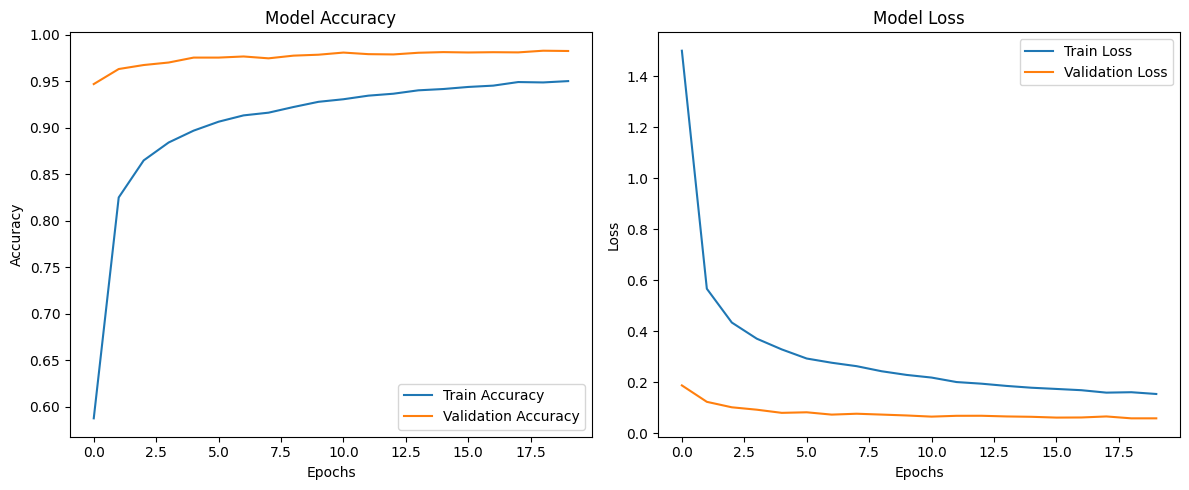

In [11]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
True Label: 34, Predicted Class: 34


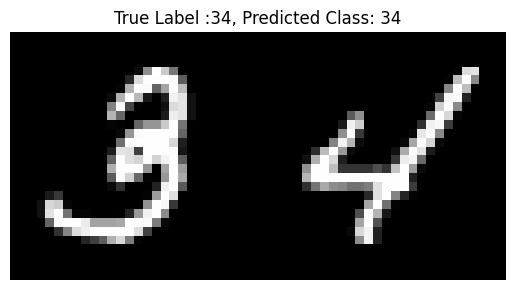

In [12]:
test_index = 111
test_image = x_test[test_index]
test_label = np.argmax(y_test[test_index])

test_image_expanded = np.expand_dims(test_image, axis = 0)

predicted_probabilities = model.predict(test_image_expanded)
predicted_class = np.argmax(predicted_probabilities)

print(f"True Label: {test_label}, Predicted Class: {predicted_class}")

plt.imshow(test_image.squeeze(),cmap = 'gray')
plt.title(f"True Label :{test_label}, Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()